# Seasonal Winds

In [24]:
import xarray as xr
import numpy as np
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt

In [65]:
file_in_gridmet = "/data/keeling/a/ctavila2/b/gridMET_FWI_Inputs/vs/*"
file_in_base_MACA = "/data/keeling/a/ctavila2/b/MACA_FWI_Inputs"
file_paths_vs = sorted(glob.glob(file_in_gridmet))
start_year, end_year = 1979, 2022
lon_max_sc = -116.5
lon_min_sc = -118.5
lat_min_sc = 34
lat_max_sc = 36

In [57]:
ws_arr = []
for file_paths_i in file_paths_vs:
    ds_i = xr.open_dataset(file_paths_i)
    ds_i = ds_i.where((ds_i.lon >= lon_min_sc) & (ds_i.lon <= lon_max_sc) & 
                                    (ds_i.lat >= lat_min_sc) & (ds_i.lat <= lat_max_sc), drop=True)
    ds_i = ds_i.sel(day=~((ds_i.day.dt.month == 2) & (ds_i.day.dt.day == 29)))
    spatial_aggregate = ds_i.mean(dim=['lon'])
    spatial_aggregate = spatial_aggregate.mean(dim=['lat'])
    if len(spatial_aggregate["wind_speed"].values) == 366:
        print('a')
    ws_arr.append(spatial_aggregate["wind_speed"].values)
    #plt.plot(spatial_aggregate["wind_speed"].values, alpha=.2)
    
los_angeles_wind_climatology = np.array(ws_arr).mean(axis=0)
ninetyseven_5_percentile = np.percentile(ws_arr, 97.5, axis=0)
two_5_percentile = np.percentile(ws_arr, 2.5, axis=0)

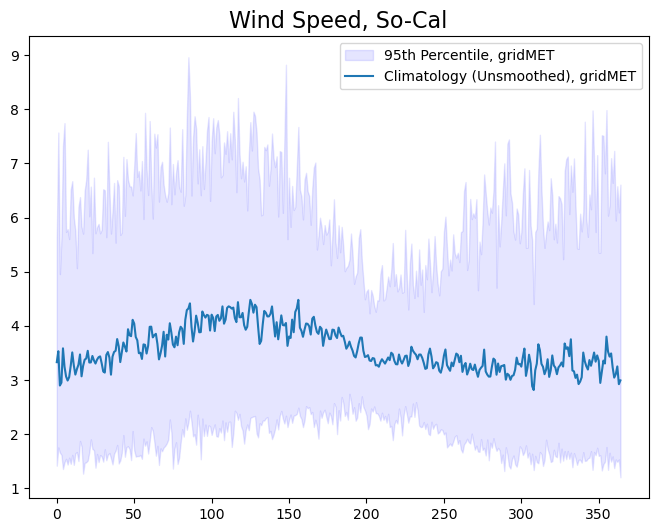

In [64]:
plt.figure(figsize=(8,6))
plt.title('Wind Speed, So-Cal', fontsize=16)
plt.fill_between(np.arange(0,365), ninetyseven_5_percentile, two_5_percentile, label="95th Percentile, gridMET", color='b', alpha=.1)
plt.plot(los_angeles_wind_climatology, label='Climatology (Unsmoothed), gridMET')
plt.legend()

In [67]:
glob.glob(f'{file_in_base_MACA}/*')

['/data/keeling/a/ctavila2/b/MACA_FWI_Inputs/ws_rcp45_norcal.csv',
 '/data/keeling/a/ctavila2/b/MACA_FWI_Inputs/ws_rcp45_socal.csv',
 '/data/keeling/a/ctavila2/b/MACA_FWI_Inputs/ws_rcp85_socal.csv',
 '/data/keeling/a/ctavila2/b/MACA_FWI_Inputs/ws_rcp85_norcal.csv',
 '/data/keeling/a/ctavila2/b/MACA_FWI_Inputs/ws_historical_socal.csv',
 '/data/keeling/a/ctavila2/b/MACA_FWI_Inputs/ws_historical_norcal.csv']